In [1]:
import numpy as np
from numpy.linalg import norm
# Gensim for visualization
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Plotting utilities
# %matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 
from sklearn.decomposition import PCA
# Only if using jupyter themes
# from jupyterthemes import jtplot
# jtplot.style()


In [2]:
glove_file = ("glove.6B.100d.txt")
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [3]:
with open(glove_file) as f:
    for i, line in enumerate(f):
        print(line)
        if i>=5:break

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [5]:
model.most_similar('cat')

[('dog', 0.8798074722290039),
 ('rabbit', 0.7424426674842834),
 ('cats', 0.7323004007339478),
 ('monkey', 0.7288709878921509),
 ('pet', 0.7190139889717102),
 ('dogs', 0.7163872718811035),
 ('mouse', 0.6915250420570374),
 ('puppy', 0.6800068020820618),
 ('rat', 0.6641027331352234),
 ('spider', 0.6501135230064392)]

1. Implementar función de semejanza y distancia a partir de los vectores de embeddings que se vieron en clases.

In [6]:
def print_sim_distance(w1, w2):
  word1, word2 = model[w1], model[w2]
  distance = np.dot(word1, word2)/(norm(word1) * norm(word2))
  print(f'{w1} is {distance} similar to {w2}')

In [7]:
print_sim_distance('cereal', 'milk')

cereal is 0.6154871582984924 similar to milk


2. Implementar función que permite realizar analagías dadas 3 palabras, como los ejemplos que se vieron en clases.



In [8]:
def print_analogy(w1, w2, y1):
  analogy = model.most_similar(positive=[y1, w2], negative=[w1])
  print(f'The closest word is {analogy[0][0]} with a distance {analogy[0][1]:.4f}')

In [9]:
print_analogy('mexico', 'mexican', 'argentina')

The closest word is argentine with a distance 0.9036


3. Implementar función para hacer plot de palabras en dos dimensiones utilizando PCA para reducir la dimensionalidad de los vectores.

In [10]:
def display_wordmap(model, words):
    wordmap = PCA(n_components=2)  # seleccionamos 2 dimensiones
    d = wordmap.fit_transform(model)  # aplicamos pca
    plt.figure(figsize=(10, 7), dpi=100)
    plt.plot(d[:, 0], d[:, 1], '.')
    for i in range(len(d)):
        plt.annotate(words[i], xy=d[i])

In [11]:
words = ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries',
             'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'germany',
             'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka',
             'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape',
             'school', 'work', 'university', 'highschool']
model = [model[x] for x in words]


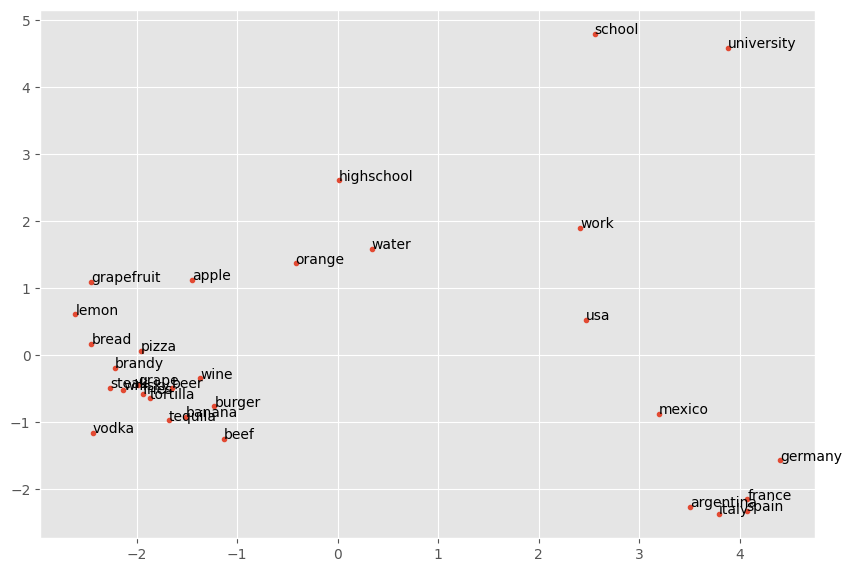

In [12]:
display_wordmap(model, words)